In [69]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
Data_Vis = pd.read_csv("E:/Enefit_Data/predict-energy-behavior-of-prosumers/merged_production_consumption_installed_capacity_datetime_solar_radiation.csv")
Data_Vis

,Unnamed: 0.1,datetime,temperature,direct_solar_radiation,latitude,longitude,Unnamed: 0,county,county_name,is_business,installed_capacity,product_type,production,consumption
0,0,2021-09-01 00:00:00,14.6,277.0,57.6,23.2,0.0,0.0,HARJUMAA,0.0,952.89,1.0,0.713,96.590
1,1,2021-09-01 00:00:00,14.6,277.0,57.6,23.2,2.0,0.0,HARJUMAA,0.0,166.40,2.0,0.000,17.314
2,2,2021-09-01 00:00:00,14.6,277.0,57.6,23.2,4.0,0.0,HARJUMAA,0.0,7207.88,3.0,2.904,656.859
3,3,2021-09-01 00:00:00,14.6,277.0,57.6,23.2,6.0,0.0,HARJUMAA,1.0,400.00,0.0,0.000,59.000
4,4,2021-09-01 00:00:00,14.6,277.0,57.6,23.2,8.0,0.0,HARJUMAA,1.0,1411.00,1.0,0.000,501.760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48072518,48072521,2023-05-29 21:00:00,10.5,6.0,59.7,28.2,2011842.0,15.0,VÕRUMAA,0.0,415.60,1.0,0.865,41.848
48072519,48072522,2023-05-29 21:00:00,10.5,6.0,59.7,28.2,2011844.0,15.0,VÕRUMAA,0.0,2035.75,3.0,4.929,125.295
48072520,48072523,2023-05-29 21:00:00,10.5,6.0,59.7,28.2,2011846.0,15.0,VÕRUMAA,1.0,620.00,0.0,0.800,319.341
48072521,48072524,2023-05-29 21:00:00,10.5,6.0,59.7,28.2,2011848.0,15.0,VÕRUMAA,1.0,624.50,1.0,1.140,34.176


# 1. Selecting Desired Columns 
# 2. Group based on datetime 
# 3. Split 'datetime' into 'date' and 'time'

In [37]:
#1.Selecting Desired Columns
desired_columns = ['datetime', 'is_business', 'direct_solar_radiation', 'installed_capacity','product_type','production', 'consumption' ]
reordered_df3 = Data_Vis[desired_columns]
# df2['installed_capacity']= df2['installed_capacity'].astype('float32')
# df2['is_business']= df2['is_business'].astype('float32')
# df2['direct_solar_radiation']= df2['direct_solar_radiation'].astype('float32')
# df2['product_type']= df2['product_type'].astype('float32')
# df2['production']= df2['production'].astype('float32')
# df2['consumption']= df2['consumption'].astype('float32')
#2.Group based on datetime
mean_per_datetime = reordered_df3.groupby('datetime')[['production','consumption', 'is_business', 'direct_solar_radiation', 'installed_capacity','product_type']].mean().reset_index()
#3.Split 'datetime' into 'date' and 'time'
mean_per_datetime [['date','time']] = mean_per_datetime['datetime'].str.split (' ',n=1,expand=True) 
mean_per_datetime.info()
mean_per_datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11993 entries, 0 to 11992
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   datetime                11993 non-null  datetime64[ns]
 1   production              11993 non-null  float64       
 2   consumption             11993 non-null  float64       
 3   is_business             11993 non-null  float64       
 4   direct_solar_radiation  11993 non-null  float64       
 5   installed_capacity      11993 non-null  float64       
 6   product_type            11993 non-null  float64       
 7   date                    11993 non-null  object        
 8   time                    11993 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 843.4+ KB


,datetime,production,consumption,is_business,direct_solar_radiation,installed_capacity,product_type,date,time
0,2021-09-01 00:00:00,0.071508,325.570623,0.508197,275.500000,1158.348525,2.000000,2021-09-01,00:00:00
1,2021-09-01 01:00:00,0.194295,315.820951,0.508197,154.000000,1158.348525,2.000000,2021-09-01,01:00:00
2,2021-09-01 02:00:00,0.030246,315.752328,0.508197,56.000000,1158.348525,2.000000,2021-09-01,02:00:00
3,2021-09-01 03:00:00,0.024869,311.909574,0.508197,6.500000,1158.348525,2.000000,2021-09-01,03:00:00
4,2021-09-01 06:00:00,1.182836,395.026590,0.508197,3.808511,1158.348525,2.000000,2021-09-01,06:00:00
...,...,...,...,...,...,...,...,...,...
11988,2023-05-29 17:00:00,657.924908,327.331246,0.553846,324.400000,2280.287769,1.876923,2023-05-29,17:00:00
11989,2023-05-29 18:00:00,413.409400,364.129477,0.553846,236.836364,2280.287769,1.876923,2023-05-29,18:00:00
11990,2023-05-29 19:00:00,166.260169,437.482492,0.553846,134.554545,2280.287769,1.876923,2023-05-29,19:00:00
11991,2023-05-29 20:00:00,52.408385,486.468923,0.553846,55.400000,2280.287769,1.876923,2023-05-29,20:00:00


In [57]:
#droppingdatetime
df_ddt = mean_per_datetime.drop(['datetime','time'], axis=1)
#converting datatype of 'date' to datetime
df_ddt['date']= pd.to_datetime(df_ddt ['date'])
df_ddt.info()
df_ddt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11993 entries, 0 to 11992
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   production              11993 non-null  float64       
 1   consumption             11993 non-null  float64       
 2   is_business             11993 non-null  float64       
 3   direct_solar_radiation  11993 non-null  float64       
 4   installed_capacity      11993 non-null  float64       
 5   product_type            11993 non-null  float64       
 6   date                    11993 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 656.0 KB


,production,consumption,is_business,direct_solar_radiation,installed_capacity,product_type,date
0,0.071508,325.570623,0.508197,275.500000,1158.348525,2.000000,2021-09-01
1,0.194295,315.820951,0.508197,154.000000,1158.348525,2.000000,2021-09-01
2,0.030246,315.752328,0.508197,56.000000,1158.348525,2.000000,2021-09-01
3,0.024869,311.909574,0.508197,6.500000,1158.348525,2.000000,2021-09-01
4,1.182836,395.026590,0.508197,3.808511,1158.348525,2.000000,2021-09-01
...,...,...,...,...,...,...,...
11988,657.924908,327.331246,0.553846,324.400000,2280.287769,1.876923,2023-05-29
11989,413.409400,364.129477,0.553846,236.836364,2280.287769,1.876923,2023-05-29
11990,166.260169,437.482492,0.553846,134.554545,2280.287769,1.876923,2023-05-29
11991,52.408385,486.468923,0.553846,55.400000,2280.287769,1.876923,2023-05-29


In [78]:
dfp = pd.melt(df_ddt, id_vars=['date'], value_vars=['production', 'consumption', 'installed_capacity', 'direct_solar_radiation' ])
dfp.info()
dfp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47972 entries, 0 to 47971
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      47972 non-null  datetime64[ns]
 1   variable  47972 non-null  object        
 2   value     47972 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.1+ MB


,date,variable,value
0,2021-09-01,production,0.071508
1,2021-09-01,production,0.194295
2,2021-09-01,production,0.030246
3,2021-09-01,production,0.024869
4,2021-09-01,production,1.182836
...,...,...,...
47967,2023-05-29,direct_solar_radiation,324.400000
47968,2023-05-29,direct_solar_radiation,236.836364
47969,2023-05-29,direct_solar_radiation,134.554545
47970,2023-05-29,direct_solar_radiation,55.400000


In [81]:
dfpc = pd.melt(df_ddt, id_vars=['date'], value_vars=['production', 'consumption','direct_solar_radiation' ])
dfpc.info()
dfpc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35979 entries, 0 to 35978
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      35979 non-null  datetime64[ns]
 1   variable  35979 non-null  object        
 2   value     35979 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 843.4+ KB


,date,variable,value
0,2021-09-01,production,0.071508
1,2021-09-01,production,0.194295
2,2021-09-01,production,0.030246
3,2021-09-01,production,0.024869
4,2021-09-01,production,1.182836
...,...,...,...
35974,2023-05-29,direct_solar_radiation,324.400000
35975,2023-05-29,direct_solar_radiation,236.836364
35976,2023-05-29,direct_solar_radiation,134.554545
35977,2023-05-29,direct_solar_radiation,55.400000


# Visualization of Mean of all Category of Prosumers 

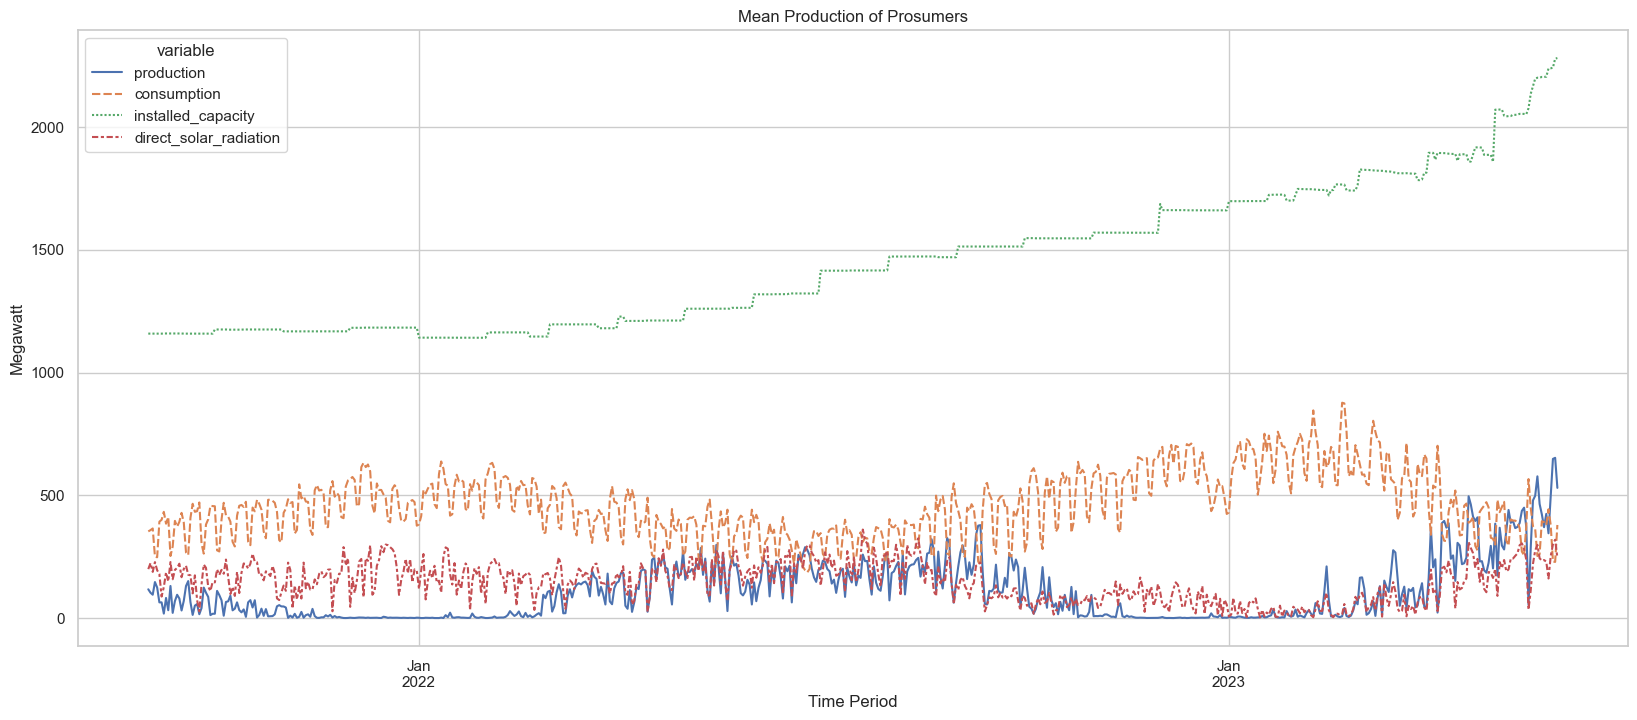

In [77]:
sns.set_style(style="whitegrid")
fig,p = plt.subplots(figsize=(20, 8))
p = sns.lineplot(data=dfp, x='date', y='value', hue='variable', errorbar = None, style="variable")
plt.xlabel('Time Period')
plt.ylabel('Megawatt')
plt.title('Mean Category of Prosumers')
#Locate based on month or year
locator = mdates.MonthLocator(bymonth=[4,7,10])
p.xaxis.set_minor_locator(locator)
p.xaxis.set_minor_formatter(mdates.ConciseDateFormatter(locator))
p.xaxis.set_major_locator(mdates.YearLocator())
p.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y')) 
plt.show(p)

# Visualization of Mean Production and Consumption of All Prosumers

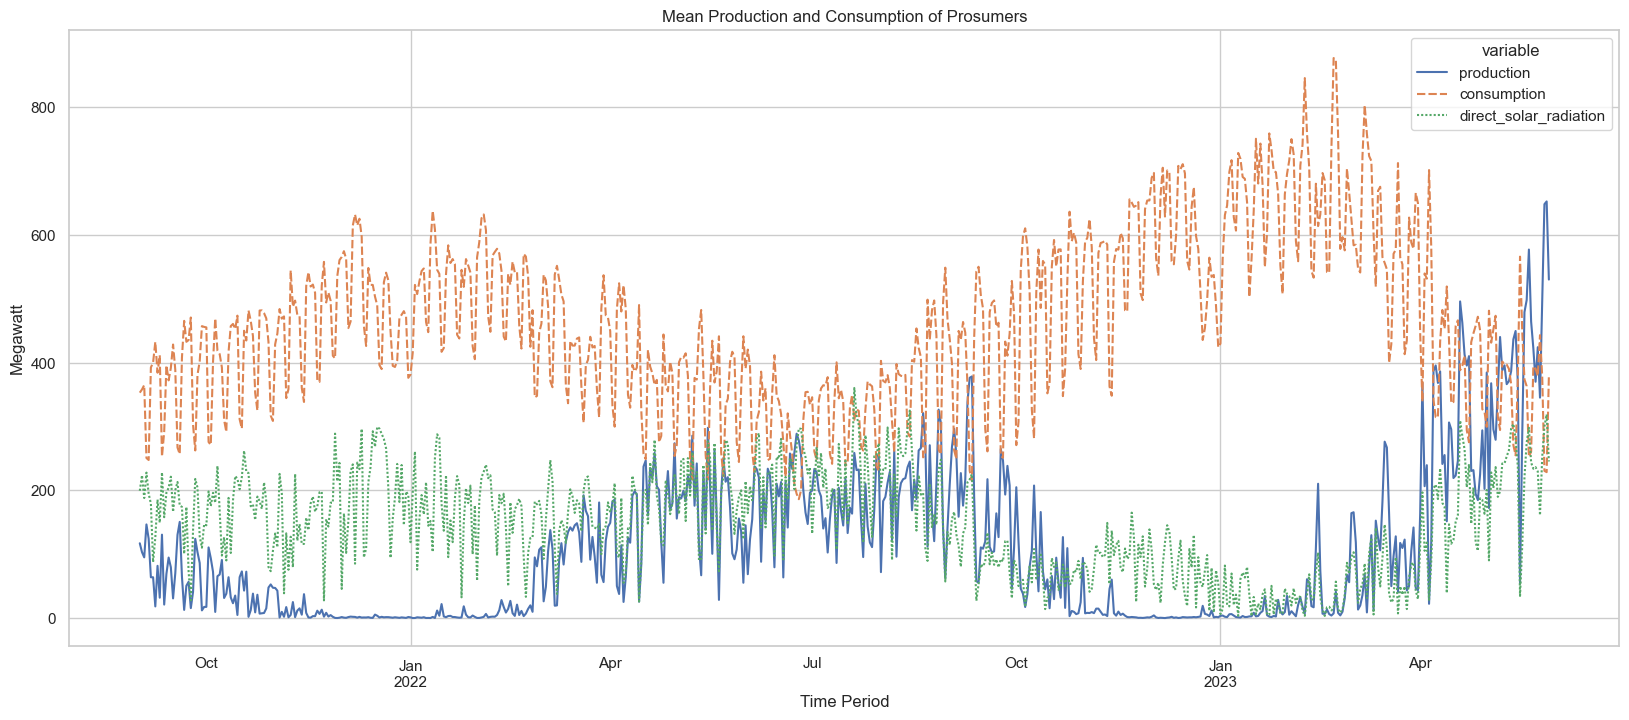

In [82]:
sns.set_style(style="whitegrid")
fig,p1 = plt.subplots(figsize=(20, 8))
p1 = sns.lineplot(data=dfpc, x='date', y='value', hue='variable', errorbar = None, style="variable")
plt.xlabel('Time Period')
plt.ylabel('Megawatt')
plt.title('Mean Production and Consumption of Prosumers')
#Locate based on month or year
locator = mdates.MonthLocator(bymonth=[4,7,10])
p1.xaxis.set_minor_locator(locator)
p1.xaxis.set_minor_formatter(mdates.ConciseDateFormatter(locator))
p1.xaxis.set_major_locator(mdates.YearLocator())
p1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y')) 
plt.show(p1)